In [1]:
%pip install tensorflow-datasets==4.9.3
# tfds-nightly 설치
%pip install tfds-nightly==4.9.3.dev202311210044
%pip install ipywidgets

   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   ---------------------------------------- 5.0/5.0 MB 43.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ---------------------------------------- 3.0/3.0 MB 44.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.9.7
    Uninstalling tensorflow-datasets-4.9.7:
      Successfully uninstalled tensorflow-datasets-4.9.7
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   --------------------------------- ------ 4.2/5.0 MB 22.9 MB/s eta 0:00:01
   ---------------------------------------- 5.0/5.0 MB 23.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.3 MB ? eta -:--:--
   --------

In [1]:
# 드롭아웃 예제
# 라이브러리
import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
# imdb_reviews에 토큰화와 변환을 거친 자료
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k',
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    with_info=True,
    as_supervised=True
)
padded_shapes = ([None], ())
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\tkdgu\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0.incomplete2BE0J8\imdb_reviews-train…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\tkdgu\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0.incomplete2BE0J8\imdb_reviews-test.…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\tkdgu\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0.incomplete2BE0J8\imdb_reviews-unsup…

Dataset imdb_reviews downloaded and prepared to C:\Users\tkdgu\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0. Subsequent calls will reuse this data.


In [3]:
train_batch, train_labels = next(iter(train_batches))
train_batch.numpy()

array([[ 298,  582,    1, ...,    0,    0,    0],
       [  12,  270, 7516, ..., 2694, 2139, 7975],
       [  62,   18,  252, ...,    0,    0,    0],
       ...,
       [ 884, 2142, 4488, ...,    0,    0,    0],
       [8002, 7968,  123, ...,    0,    0,    0],
       [  12,   96,  579, ...,    0,    0,    0]], dtype=int64)

In [4]:
# info는 메타 정보에서 encoder 정보 추출
encoder = info.features['text'].encoder
# 모델 생성
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),    # 임베딩층은 단어 하나당 하나의 벡터로 저장
    tf.keras.layers.LSTM(64),   # *tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)) - 양방향, 훈련 정확도 높아짐
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
# 모델 컴파일 및 훈련
model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history1 = model1.fit(train_batches, epochs=5, validation_data=test_batches, validation_steps=30)

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 272s 108ms/step - accuracy: 0.5038 - loss: 0.6936 - val_accuracy: 0.5033 - val_loss: 0.6866
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 489s 196ms/step - accuracy: 0.5112 - loss: 0.6829 - val_accuracy: 0.5100 - val_loss: 0.6800
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 433s 173ms/step - accuracy: 0.5281 - loss: 0.6695 - val_accuracy: 0.5133 - val_loss: 0.6829
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 294s 118ms/step - accuracy: 0.5304 - loss: 0.6569 - val_accuracy: 0.5467 - val_loss: 0.6820
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 274s 109ms/step - accuracy: 0.5451 - loss: 0.6543 - val_accuracy: 0.7067 - val_loss: 0.5893


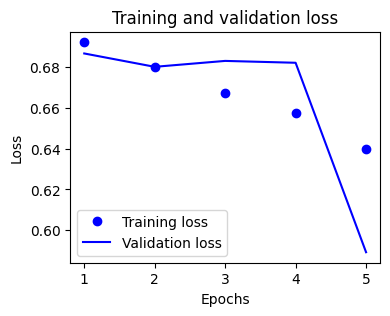

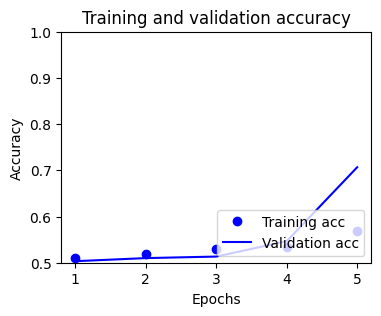

In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_batches.shuffle(BUFFER_SIZE)
import matplotlib.pyplot as plt
history_dict = history1.history   # 훈련 시 출력 정보를 history_dict으로 저장
acc = history_dict['accuracy']    # accuracy 정보(훈련 정확도)를 acc에 저장
val_acc = history_dict['val_accuracy']  # val_accuracy(검증 정확도) 정보를 val_acc에 저장
loss = history_dict['loss']       # loss(훈련 loss) 정보를 loss에 저장
val_loss = history_dict['val_loss']  # val_loss(검증 loss) 정보를 val_loss에 저장
epochs = range(1, len(acc) + 1)   # epochs 값을 [1 ~ 5] 값을 가지게 함. 
plt.figure(figsize=(4,3))           
plt.plot(epochs, loss, 'bo', label='Training loss')     # Training loss 라는 이름으로 epochs별, loss를 'bo(점)'형식으로 표현
plt.plot(epochs, val_loss, 'b', label='Validation loss')  # Validation loss 라는 이름으로 epochs별로, val_loss를 'b(선)'형식으로 표현
plt.title('Training and validation loss')  # 그래프 타이틀
plt.xlabel('Epochs')  # X축은 epochs 값
plt.ylabel('Loss')    # Y축은 loss 값
plt.legend()          # 범례 표시. 위치값이 없으면 자동으로 위치를 가져감
plt.show()

plt.figure(figsize=(4,3))
plt.plot(epochs, acc, 'bo', label='Training acc')  # Training acc 라는 이름으로 epochs별, acc를 'bo(점)'형식으로 표현
plt.plot(epochs, val_acc, 'b', label='Validation acc') # Validation acc 라는 이름으로 epochs별로, val_acc를 'b(선)'형식으로 표현
plt.title('Training and validation accuracy') # 그래프 타이틀
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')   # 범례 표시 (상단 우측)
plt.ylim((0.5,1))
plt.show()

In [7]:
# Dropout을 적용한 모델을 생성
# 모델 생성(드롭아웃 적용)
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),  
    # tf.keras.layers.LSTM(64),  # Bidrectional()레이어로 변경... 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# 훈련 작업 진행
model2.compile(loss='binary_crossentropy',          
              optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])
history2 = model2.fit(train_batches, epochs=5, validation_data=test_batches, validation_steps=30)

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 841s 335ms/step - accuracy: 0.5949 - loss: 0.6498 - val_accuracy: 0.8033 - val_loss: 0.4557
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1094s 437ms/step - accuracy: 0.7957 - loss: 0.4672 - val_accuracy: 0.8033 - val_loss: 0.4826
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4459s 2s/step - accuracy: 0.7722 - loss: 0.5084 - val_accuracy: 0.7667 - val_loss: 0.5244
Epoch 4/5
 771/2500 ━━━━━━━━━━━━━━━━━━━━ 11:09 387ms/step - accuracy: 0.7838 - loss: 0.4900

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_batches.shuffle(BUFFER_SIZE)
import matplotlib.pyplot as plt
history_dict = history2.history   # 훈련 시 출력 정보를 history_dict으로 저장
acc = history_dict['accuracy']    # accuracy 정보(훈련 정확도)를 acc에 저장
val_acc = history_dict['val_accuracy']  # val_accuracy(검증 정확도) 정보를 val_acc에 저장
loss = history_dict['loss']       # loss(훈련 loss) 정보를 loss에 저장
val_loss = history_dict['val_loss']  # val_loss(검증 loss) 정보를 val_loss에 저장
epochs = range(1, len(acc) + 1)   # epochs 값을 [1 ~ 5] 값을 가지게 함. 
plt.figure(figsize=(4,3))         
plt.plot(epochs, loss, 'bo', label='Training loss')     # Training loss 라는 이름으로 epochs별, loss를 'bo(점)'형식으로 표현
plt.plot(epochs, val_loss, 'b', label='Validation loss')  # Validation loss 라는 이름으로 epochs별로, val_loss를 'b(선)'형식으로 표현
plt.title('Training and validation loss')  # 그래프 타이틀
plt.xlabel('Epochs')  # X축은 epochs 값
plt.ylabel('Loss')    # Y축은 loss 값
plt.legend()          # 범례 표시. 위치값이 없으면 자동으로 위치를 가져감
plt.show()

plt.figure(figsize=(4,3))
plt.plot(epochs, acc, 'bo', label='Training acc')  # Training acc 라는 이름으로 epochs별, acc를 'bo(점)'형식으로 표현
plt.plot(epochs, val_acc, 'b', label='Validation acc') # Validation acc 라는 이름으로 epochs별로, val_acc를 'b(선)'형식으로 표현
plt.title('Training and validation accuracy') # 그래프 타이틀
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')   # 범례 표시 (상단 우측)
plt.ylim((0.5,1))
plt.show()